In [1]:
!pip install pillow 

In [2]:
import os
from PIL import Image

# Directory containing input JPEG images
input_directory = "C:/Users/Hardik/Documents/ThinningAlgo/fileJpg/"

# Directory to save grayscale BMP images
output_directory = "C:/Users/Hardik/Documents/ThinningAlgo/data/"

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# List all files in the input directory
all_files = os.listdir(input_directory)

# Filter the files to keep only those with a .jpg or .jpeg extension
image_file_names = [file for file in all_files if file.lower().endswith(('.jpg', '.jpeg'))]

for image_file_name in image_file_names:
    # Construct the full path to the input JPEG image
    input_image_path = os.path.join(input_directory, image_file_name)

    # Load the JPEG image
    jpeg_image = Image.open(input_image_path)

    # Convert the image to grayscale
    gray_image = jpeg_image.convert("L")

    # Construct the full path to save the grayscale BMP image
    output_image_path = os.path.join(output_directory, image_file_name)
    


    # Save the grayscale image as a BMP file
    gray_image.save(output_image_path)

    # Close the images
    jpeg_image.close()
    gray_image.close()

print("Conversion to grayscale complete. Grayscale BMP images saved in the output directory.")


Conversion to grayscale complete. Grayscale BMP images saved in the output directory.


C:\Users\Hardik\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


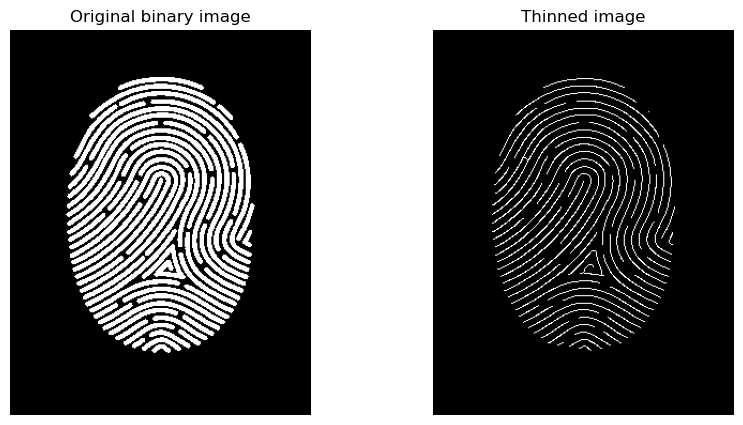

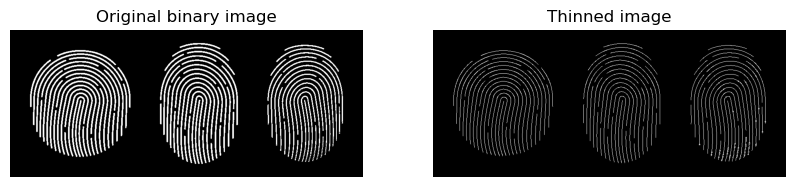

In [ ]:
import os
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.filters import threshold_otsu
from skimage import img_as_ubyte

def neighbours(x,y,image):
    "Return 8-neighbours of image point P1(x,y), in a clockwise order"
    img = image
    x_1, y_1, x1, y1 = x-1, y-1, x+1, y+1
    return [ img[x_1][y], img[x_1][y1], img[x][y1], img[x1][y1],     # P2,P3,P4,P5
                img[x1][y], img[x1][y_1], img[x][y_1], img[x_1][y_1] ]    # P6,P7,P8,P9

def transitions(neighbours):
    "No. of 0,1 patterns (transitions from 0 to 1) in the ordered sequence"
    n = neighbours + neighbours[0:1]      # P2, P3, ... , P8, P9, P2
    return sum( (n1, n2) == (0, 1) for n1, n2 in zip(n, n[1:]) )  # (P2,P3), (P3,P4), ... , (P8,P9), (P9,P2)

def thinningAlgorithm(image):
    "the Zhang-Suen Thinning Algorithm"
    Image_Thinned = image.copy()  # deepcopy to protect the original image                                  
    changing1 = changing2 = 1        #  the points to be removed (set as 0)
    while changing1 or changing2:   #  iterates until no further changes occur in the image
        # Step 1
        changing1 = []
        rows, columns = Image_Thinned.shape               # x for rows, y for columns
        for x in range(1, rows - 1):                     # No. of  rows
            for y in range(1, columns - 1):            # No. of columns
                P2,P3,P4,P5,P6,P7,P8,P9 = n = neighbours(x, y, Image_Thinned)
                if (Image_Thinned[x][y] == 1     and    # Condition 0: Point P1 in the object regions 
                    2 <= sum(n) <= 6   and    # Condition 1: 2<= N(P1) <= 6
                    transitions(n) == 1 and    # Condition 2: S(P1)=1  
                    P2 * P4 * P6 == 0  and    # Condition 3   
                    P4 * P6 * P8 == 0):         # Condition 4
                    changing1.append((x,y))
        for x, y in changing1: 
            Image_Thinned[x][y] = 0
        # Step 2 
        changing2 = [] 
        for x in range(1, rows - 1): 
            for y in range(1, columns - 1):
                P2,P3,P4,P5,P6,P7,P8,P9 = n = neighbours(x, y, Image_Thinned)
                if (Image_Thinned[x][y] == 1   and        # Condition 0
                    2 <= sum(n) <= 6  and       # Condition 1
                    transitions(n) == 1 and      # Condition 2
                    P2 * P4 * P8 == 0 and       # Condition 3
                    P2 * P6 * P8 == 0):            # Condition 4
                    changing2.append((x,y))    
        for x, y in changing2: 
            Image_Thinned[x][y] = 0
    return Image_Thinned 

# Directory containing grayscale images
input_directory = "C:/Users/Hardik/Documents/ThinningAlgo/data/"

# List all files in the input directory
all_files = os.listdir(input_directory)

# Filter the files to keep only those with a .jpg or .jpeg extension
image_file_names = [file for file in all_files if file.lower().endswith(('.jpg', '.jpeg'))]

for image_file_name in image_file_names:
    # Construct the full path to the input grayscale image
    input_image_path = os.path.join(input_directory, image_file_name)

    # Load the grayscale image
    Img_Original = io.imread(input_image_path)

    # Convert the grayscale image to binary using Otsu's method
    Otsu_Threshold = threshold_otsu(Img_Original)
    BW_Original = Img_Original < Otsu_Threshold

    # Apply the Zhang-Suen Thinning Algorithm
    BW_Skeleton = thinningAlgorithm(BW_Original)

    # Convert the thinned image to a format suitable for display
    BW_Skeleton_display = img_as_ubyte(BW_Skeleton)

    # Display the original and thinned images using Matplotlib
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax1, ax2 = ax.ravel()
    ax1.imshow(BW_Original, cmap=plt.cm.gray)
    ax1.set_title('Original binary image')
    ax1.axis('off')
    ax2.imshow(BW_Skeleton_display, cmap=plt.cm.gray)
    ax2.set_title('Thinned image')
    ax2.axis('off')
    plt.show()
